In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/DataPreprocessing.csv")

In [ ]:
data.head()

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes


In [ ]:
data.shape

(10, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10 non-null     object 
 1   Age             9 non-null      float64
 2   Income          9 non-null      float64
 3   Online Shopper  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
data.isna().sum()

Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

In [ ]:
data.dtypes

Region             object
Age               float64
Income            float64
Online Shopper     object
dtype: object

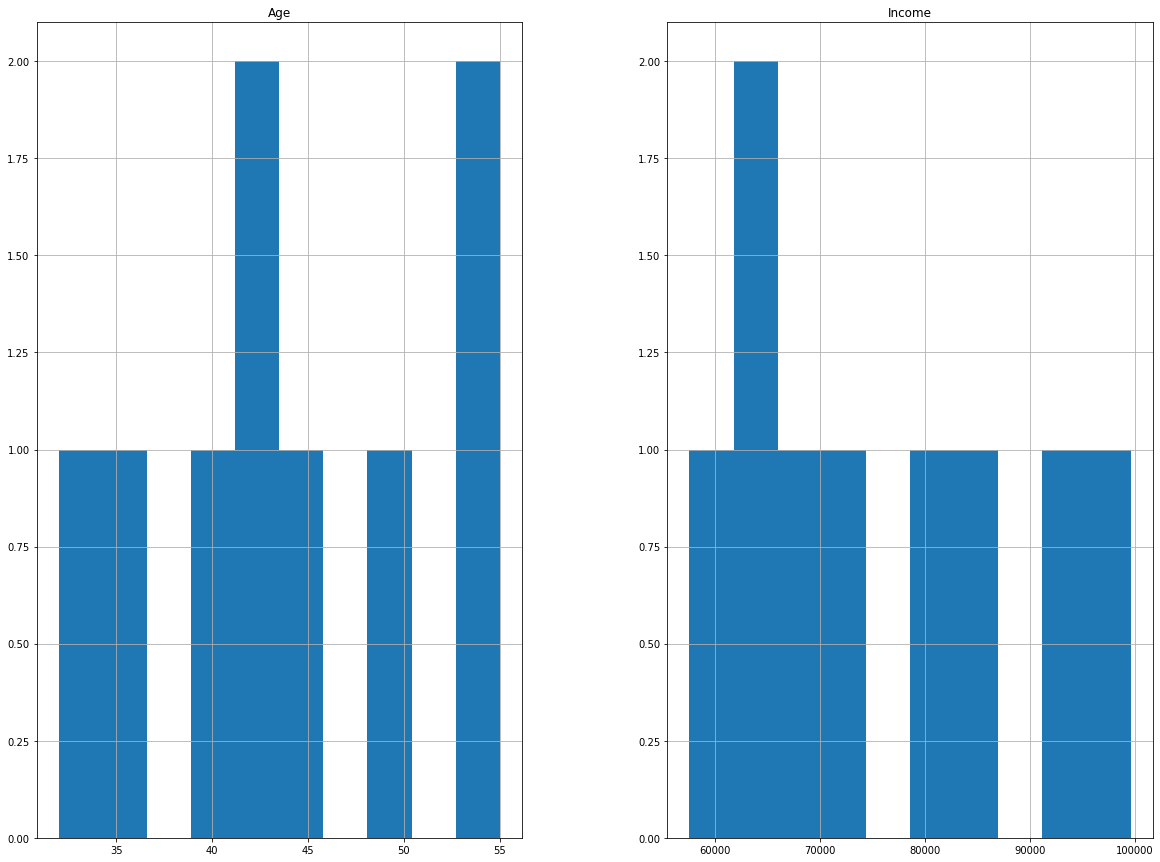

In [ ]:
dgraph=data.select_dtypes(include=['float'])
dgraph.hist(figsize=(20,15))
plt.show()

In [ ]:
data.columns

Index(['Region', 'Age', 'Income', 'Online Shopper'], dtype='object')

In [ ]:
data['Age']=data['Age'].fillna(data['Age'].median())
data.isna().sum()

Region            0
Age               0
Income            1
Online Shopper    0
dtype: int64

In [ ]:
for i in ['Income']:
  data[i]=data[i].fillna(data[i].median())

In [ ]:
data.isna().sum()

Region            0
Age               0
Income            0
Online Shopper    0
dtype: int64

In [ ]:
data.Region.nunique()

3

In [ ]:
data.drop('Region',axis=1, inplace=True)

In [ ]:
data.head()

,Age,Income,Online Shopper
0,49.0,86400.0,No
1,32.0,57600.0,Yes
2,35.0,64800.0,No
3,43.0,73200.0,No
4,45.0,73200.0,Yes


Text(0.5, 1.0, 'Box plot of DataPreprocessing')

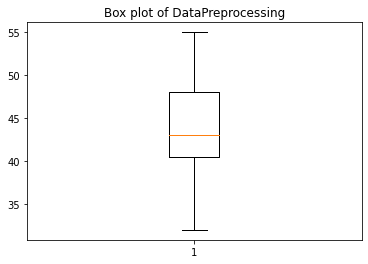

In [ ]:
plt.boxplot(data['Age'])
plt.title('Box plot of DataPreprocessing')

Text(0.5, 1.0, 'box plot of DataPreprocessing')

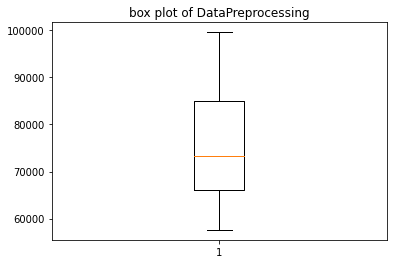

In [ ]:
plt.boxplot(data['Income'])
plt.title("box plot of DataPreprocessing")

In [ ]:
data.shape

(10, 3)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Online Shopper']= label_encoder.fit_transform(data['Online Shopper'])
data['Online Shopper'].unique()

array([0, 1])

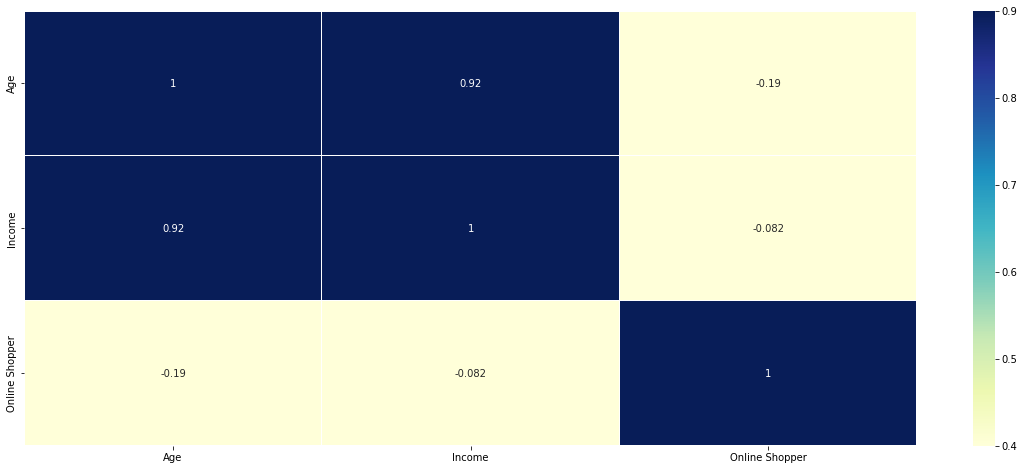

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')

In [ ]:
data.columns
y=data["Online Shopper"]
X=data.drop("Online Shopper", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSC is:",mean_squared_error(y_test,prediction))

MSC is: 0.6841399593966528


In [ ]:
from sklearn.metrics import r2_score
print('R squared value is :',r2_score(y_test,prediction))

R squared value is : -1.7365598375866114


In [ ]:
X.describe()

,Age,Income
count,10.000000,10.000000
mean,43.700000,76200.000000
std,7.257946,13916.896206
min,32.000000,57600.000000
25%,40.500000,66000.000000
50%,43.000000,73200.000000
75%,48.000000,84900.000000
max,55.000000,99600.000000


In [ ]:
type(X)

pandas.core.frame.DataFrame